In [1]:
img_url = 'https://www.soyuz.ru/public/uploads/files/2/7393973/201910191417186948f5f1b7.jpg'
video_url = 'https://www.youtube.com/watch?v=sHzdsFiBbFc'

## ДЗ №1

1. Поместить в центр рисунка белый квадрат, занимающий 10% площади рисунка.

Изначальная картинка (555x1000)


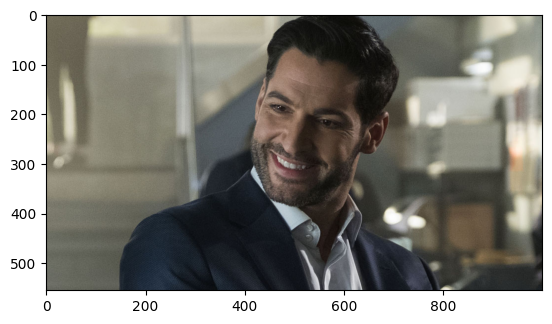

Новая картинка


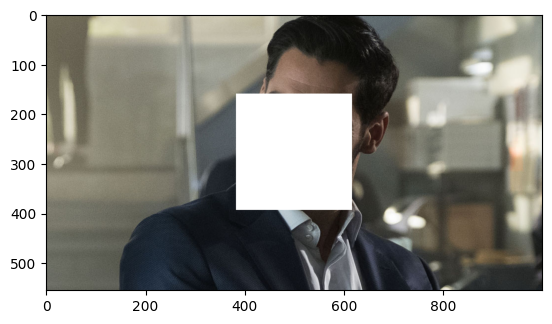

In [3]:

from urllib.request import urlopen

import matplotlib.pyplot as plt

orig_img = plt.imread(urlopen(img_url), format='jpg')
print(f'Изначальная картинка ({orig_img.shape[0]}x{orig_img.shape[1]})')
plt.imshow(orig_img)
plt.show()

print('Новая картинка')
new_img = orig_img.copy()
center = [i // 2 for i in new_img.shape[:-1]]
size = center[0] * center[1] * 4
half_a = int((size * 0.1) ** 0.5) // 2
new_img[center[0] - half_a: center[0] + half_a, center[1] - half_a: center[1] + half_a, :] = 255
plt.imshow(new_img)
plt.show()


## ДЗ №2

1. Поместить в в случайном месте каждого кадра видеопотока белый кварат со стороной 50 px.

In [6]:

import cv2, pafy
import random

video = pafy.new(video_url, basic=False)
best = video.getbest()
print("BEST QUALITY -", best)

filepath = '/tmp/1c3e7c11-1e09-4915-ad4a-1d7b57733c5b.mp4'
print("DOWNLOADING...")
filename = best.download(filepath=filepath, quiet=False)
print('DONE DOWNLOADING...')

print('STARTING PLAYER...')
capture = cv2.VideoCapture(filepath)
capture.set(cv2.CAP_PROP_FPS, 10)

while True:
    rtrn, image = capture.read()
    if not rtrn:
        break
    width, height = image.shape[:2]
    x, y = random.randint(0, width - 50), random.randint(0, height - 50)
    image[x: x + 50, y: y + 50, :] = [255] * 3

    cv2.imshow("OpenCV", image)

    if cv2.waitKey(1000 // 30) == ord('q'):
        print('QUITING...')
        break

print('VIDEO PLAYED...')

capture.release()
cv2.destroyAllWindows()

  4,372,327.0 Bytes [100.00%] received. Rate: [  45 KB/s].  ETA: [0 secs]    
DONE DOWNLOADING...
STARTING PLAYER...


QUITING...
VIDEO PLAYED...
BEST QUALITY - normal:mp4@320x240
DOWNLOADING...

DONE DOWNLOADING...
STARTING PLAYER...
QUITING...
VIDEO PLAYED...


In [7]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [58]:
import numpy as np
import soundfile as sf
import io
from six.moves.urllib.request import urlopen

audio_data = 'https://raw.githubusercontent.com/karolpiczak/ESC-50/master/audio/1-30226-A-0.wav'
data, sample_rate = sf.read(io.BytesIO(urlopen(audio_data).read()))


In [9]:
import IPython.display as ipd

ipd.Audio(audio_data)

2205
0.03655798212913945
[ 5.37109375e-02  6.57043457e-02  7.32421875e-02  7.73010254e-02
  7.81555176e-02  7.56835938e-02  6.79931641e-02  5.43823242e-02
  3.75976562e-02  1.94396973e-02 -3.05175781e-05 -1.95312500e-02
 -3.71093750e-02 -5.13610840e-02 -6.15844727e-02 -6.75964355e-02
 -6.82067871e-02 -6.26525879e-02 -5.34362793e-02 -4.33654785e-02
 -3.27148438e-02 -2.11791992e-02 -8.05664062e-03  7.78198242e-03
  2.53601074e-02  4.26635742e-02  5.99365234e-02  7.75451660e-02
  9.32922363e-02  1.04339600e-01  1.10412598e-01  1.12487793e-01
  1.09741211e-01  1.00097656e-01  8.42895508e-02  6.60095215e-02
  4.72106934e-02  2.86865234e-02  1.31225586e-02  1.15966797e-03
 -9.64355469e-03 -1.98974609e-02 -2.97851562e-02 -4.01306152e-02
 -4.86145020e-02 -5.28869629e-02 -5.59692383e-02 -6.10046387e-02
 -6.61315918e-02 -6.86645508e-02 -6.90002441e-02 -6.80236816e-02
 -6.50634766e-02 -6.00585938e-02 -5.45959473e-02 -5.03234863e-02
 -4.67834473e-02 -4.15649414e-02 -3.28369141e-02 -2.01416016e-02


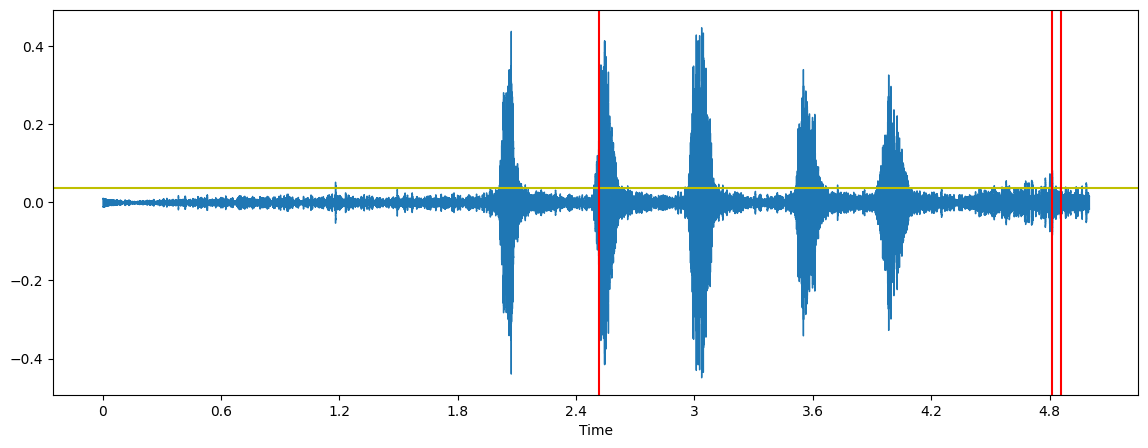

In [71]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))

amplitude = data.max() - data.min()
average = np.average(np.absolute(data))
std = np.std(data)
delta = int(0.05 * sample_rate)
print(delta)
print(std)
gt_than_std = np.where(data > average)[0]
idx_pairs = np.where(np.diff(np.hstack(([False], data > std, [False]))))[0].reshape(-1, 2)
# print(idx_pairs)
print(data[111427:112000])
start_longest_seq = idx_pairs[np.diff(idx_pairs, axis=1).argmax(), 0]

librosa.display.waveshow(data, sr=sample_rate)
plt.axhline(std, c='y')
for e in [start_longest_seq, start_longest_seq + delta]:
    plt.axvline(e / sample_rate, c='r')

plt.axvline(111000 / sample_rate, c='r')

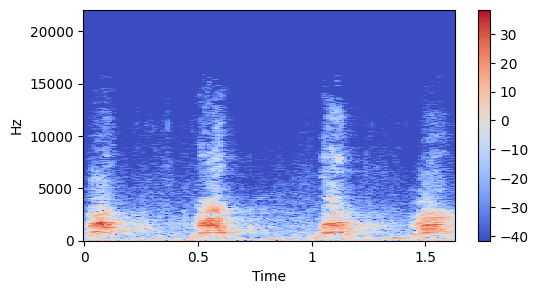

In [11]:
meaningful_data = data[109000:181000]
X = librosa.stft(meaningful_data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(6, 3))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

In [12]:
amplitude = data.max() - data.min()
average = np.average(data + amplitude)
left = np.argmax(data > average // 2)
right = data.shape[0] - np.argmax((data)[::-1] > average // 2)
print(left, right)

4264 220500


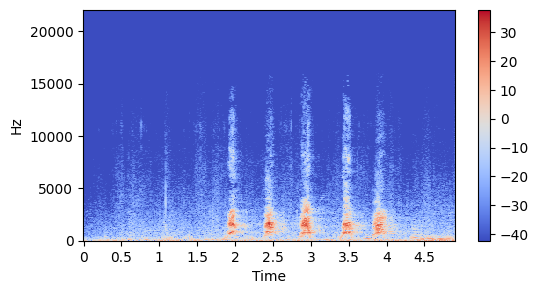

In [13]:
meaningful_data = data[left:right]
X = librosa.stft(meaningful_data)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(6, 3))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()